In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic') # 맑은 고딕으로 글꼴 설정하기
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False # 마이너스 기호 문제 해결하기
import seaborn as sns
from scipy import stats

In [203]:
do = pd.read_csv('2015_2021 지역별 자료.csv', index_col=0)
do

,시도별,value,year,Indicator Name
0,서울,20857.0,2015,GRDP (국내총생산: 만 원)
1,부산,17044.0,2015,GRDP (국내총생산: 만 원)
2,대구,17226.0,2015,GRDP (국내총생산: 만 원)
3,인천,16598.0,2015,GRDP (국내총생산: 만 원)
4,광주,17459.0,2015,GRDP (국내총생산: 만 원)
...,...,...,...,...
947,전북,69.8,2021,사교육 참여율(%)
948,전남,66.5,2021,사교육 참여율(%)
949,경북,71.8,2021,사교육 참여율(%)
950,경남,72.7,2021,사교육 참여율(%)


In [277]:
dd = do[do['Indicator Name']== '학교 시설수 (개)']
dd[dd['year'] == 2021]

,시도별,value,year,Indicator Name
697,서울,1254.0,2021,학교 시설수 (개)
698,부산,657.0,2021,학교 시설수 (개)
699,대구,492.0,2021,학교 시설수 (개)
700,인천,641.0,2021,학교 시설수 (개)
701,광주,305.0,2021,학교 시설수 (개)
702,대전,379.0,2021,학교 시설수 (개)
703,울산,271.0,2021,학교 시설수 (개)
704,세종,149.0,2021,학교 시설수 (개)
705,경기,3093.0,2021,학교 시설수 (개)
706,강원,700.0,2021,학교 시설수 (개)


In [204]:
co = pd.read_csv('연도별 학원.csv', index_col=0)
co

,year,시도별,value,Indicator Name
0,2015,서울,386,해법수학 학원수
1,2015,인천,112,해법수학 학원수
2,2015,경기,861,해법수학 학원수
3,2015,부산,155,해법수학 학원수
4,2015,대구,85,해법수학 학원수
...,...,...,...,...
114,2021,전북,59,웅진 학원수
115,2021,전남,55,웅진 학원수
116,2021,경북,123,웅진 학원수
117,2021,경남,159,웅진 학원수


In [205]:
# df = pd.concat([do, co])
df

,시도별,value,year,Indicator Name
0,서울,20857.0,2015,GRDP (국내총생산: 만 원)
1,부산,17044.0,2015,GRDP (국내총생산: 만 원)
2,대구,17226.0,2015,GRDP (국내총생산: 만 원)
3,인천,16598.0,2015,GRDP (국내총생산: 만 원)
4,광주,17459.0,2015,GRDP (국내총생산: 만 원)
...,...,...,...,...
29,전북,30.0,2021,웅진 학원수
30,전남,39.0,2021,웅진 학원수
31,경북,16.0,2021,웅진 학원수
32,경남,62.0,2021,웅진 학원수


In [206]:
import pandas as pd
from dash import Dash, html, dcc, Input, Output, callback
import plotly.express as px
import scipy.stats as stats
import plotly.io as po

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = Dash(__name__, external_stylesheets=external_stylesheets)

app.layout = html.Div([
    html.Div([

        html.Div([
            dcc.Dropdown(
                df['Indicator Name'].unique(),
                '인구수(명)',
                id='crossfilter-xaxis-column',
            ),
            dcc.RadioItems(
                ['Linear', 'Log'],
                'Linear',
                id='crossfilter-xaxis-type',
                labelStyle={'display': 'inline-block', 'marginTop': '5px'}
            )
        ],
        style={'width': '49%', 'display': 'inline-block'}),

        html.Div([
            dcc.Dropdown(
                df['Indicator Name'].unique(),
                '1인당_사교육비(만 원)',
                id='crossfilter-yaxis-column'
            ),
            dcc.RadioItems(
                ['Linear', 'Log'],
                'Linear',
                id='crossfilter-yaxis-type',
                labelStyle={'display': 'inline-block', 'marginTop': '5px'}
            )
        ], style={'width': '49%', 'float': 'right', 'display': 'inline-block'})
    ], style={
        'padding': '10px 5px'
    }),

    html.Div([
        dcc.Graph(
            id='crossfilter-indicator-scatter',
            hoverData={'points': [{'customdata': '서울'}]}
        )
    ], style={'width': '49%', 'display': 'inline-block', 'padding': '0 20'}),
    html.Div([
        dcc.Graph(id='x-time-series'),
        dcc.Graph(id='y-time-series'),
    ], style={'display': 'inline-block', 'width': '49%'}),

    html.Div(dcc.Slider(
        df['year'].min(),
        df['year'].max(),
        step=None,
        id='crossfilter-year--slider',
        value=df['year'].max(),
        marks={str(year): str(year) for year in df['year'].unique()}
    ), style={'width': '49%', 'padding': '0px 20px 20px 20px'})
])


@callback(
    Output('crossfilter-indicator-scatter', 'figure'),
    Input('crossfilter-xaxis-column', 'value'),
    Input('crossfilter-yaxis-column', 'value'),
    Input('crossfilter-xaxis-type', 'value'),
    Input('crossfilter-yaxis-type', 'value'),
    Input('crossfilter-year--slider', 'value'))
def update_graph(xaxis_column_name, yaxis_column_name,
                 xaxis_type, yaxis_type,
                 year_value):
    dff = df[df['year'] == year_value]

    fig = px.scatter(x=dff[dff['Indicator Name'] == xaxis_column_name]['value'],
                     y=dff[dff['Indicator Name'] == yaxis_column_name]['value'],
                     hover_name=dff[dff['Indicator Name'] == yaxis_column_name]['시도별'],
                     trendline = 'ols'
            )
    
    title = "statistic: " + str(stats.spearmanr(dff[dff['Indicator Name'] == xaxis_column_name]['value'],
                           dff[dff['Indicator Name'] == yaxis_column_name]['value'])[0]) + "\npvalue: " + str(stats.spearmanr(dff[dff['Indicator Name'] == xaxis_column_name]['value'],
                           dff[dff['Indicator Name'] == yaxis_column_name]['value'])[1])
    
    fig.add_annotation(x=0, y=0.95, xanchor='left', yanchor='bottom',
                       xref='paper', yref='paper', showarrow=False, align='left',
                       font=dict(family="Malgun Gothic", size=14, color="#ffffff"),
                       bordercolor="#c7c7c7", borderwidth=2,
                       borderpad=4, bgcolor="#F78181",
                       opacity=0.7,
                       text=title)

    fig.update_traces(customdata=dff[dff['Indicator Name'] == yaxis_column_name]['시도별'])

    fig.update_xaxes(title=xaxis_column_name, type='linear' if xaxis_type == 'Linear' else 'log')

    fig.update_yaxes(title=yaxis_column_name, type='linear' if yaxis_type == 'Linear' else 'log')

    fig.update_layout(margin={'l': 40, 'b': 40, 't': 10, 'r': 0}, hovermode='closest')

    return fig


def create_time_series(dff, axis_type, title):

    fig = px.scatter(dff, x='year', y='value')

    fig.update_traces(mode='lines+markers')

    fig.update_xaxes(showgrid=False)

    fig.update_yaxes(type='linear' if axis_type == 'Linear' else 'log')

    fig.add_annotation(x=0, y=0.85, xanchor='left', yanchor='bottom',
                       xref='paper', yref='paper', showarrow=False, align='left',
                       text=title)

    fig.update_layout(height=225, margin={'l': 20, 'b': 30, 'r': 10, 't': 10})
    
    return fig


@callback(
    Output('x-time-series', 'figure'),
    Input('crossfilter-indicator-scatter', 'hoverData'),
    Input('crossfilter-xaxis-column', 'value'),
    Input('crossfilter-xaxis-type', 'value'))
def update_y_timeseries(hoverData, xaxis_column_name, axis_type):
    country_name = hoverData['points'][0]['customdata']
    dff = df[df['시도별'] == country_name]
    dff = dff[dff['Indicator Name'] == xaxis_column_name]
    title = '<b>{}</b><br>{}'.format(country_name, xaxis_column_name)
    return create_time_series(dff, axis_type, title)


@callback(
    Output('y-time-series', 'figure'),
    Input('crossfilter-indicator-scatter', 'hoverData'),
    Input('crossfilter-yaxis-column', 'value'),
    Input('crossfilter-yaxis-type', 'value'))
def update_x_timeseries(hoverData, yaxis_column_name, axis_type):
    dff = df[df['시도별'] == hoverData['points'][0]['customdata']]
    dff = dff[dff['Indicator Name'] == yaxis_column_name]
    return create_time_series(dff, axis_type, yaxis_column_name)


if __name__ == '__main__':
    app.run(debug=True)

In [258]:
aca = pd.read_csv('지역별 학원수.csv', index_col=0)
aca.index = aca['지역']
aca

,지역,해법수학 학원수,푸르넷 학원수,웅진 학원수
지역,,,,
서울,서울,386,5,61
인천,인천,112,2,33
경기,경기,861,27,165
부산,부산,155,3,20
대구,대구,85,6,33
광주,광주,46,2,24
대전,대전,35,2,17
울산,울산,16,7,29
세종,세종,25,0,10


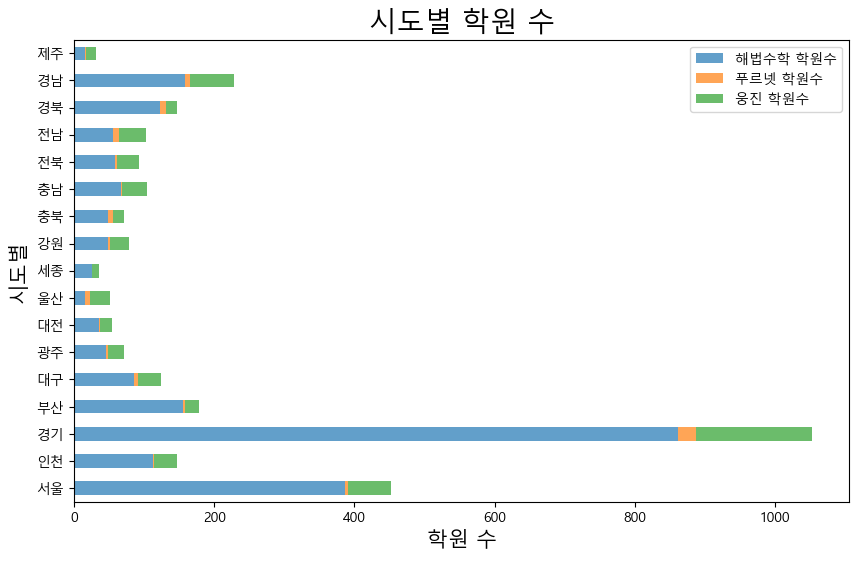

In [273]:
aca.plot(kind='barh', figsize=(10,6), stacked=True, alpha=0.7)

plt.xlabel('학원 수', size =15)
plt.ylabel('시도별', size =15)
plt.title('시도별 학원 수', size=20)
plt.show()

In [207]:
doo = pd.read_csv('2015_2021 지역별 자료2.csv', index_col=0)
doo

,시도별,GRDP (국내총생산: 만 원),year,1인당_사교육비(만 원),인구수(명),교육 서비스업 사업체 수 (개),교육 서비스업 종사자 수 (명),학교 시설수 (개),학교 면적 (㎡),사교육 참여율(%)
0,서울,20857.0,2015,35.5,9904312.0,33618.0,341006.0,1285.0,33402201.0,74.3
1,부산,17044.0,2015,27.6,3448737.0,11748.0,98479.0,643.0,17248877.0,67.8
2,대구,17226.0,2015,26.8,2466052.0,10143.0,76527.0,496.0,11862672.0,71.3
3,인천,16598.0,2015,22.9,2890451.0,7378.0,71499.0,610.0,11906374.0,65.9
4,광주,17459.0,2015,27.2,1502881.0,6603.0,50523.0,312.0,9995315.0,68.8
...,...,...,...,...,...,...,...,...,...,...
114,전북,20862.0,2021,30.0,1787053.0,9061.0,60935.0,802.0,21582179.0,69.8
115,전남,20881.0,2021,25.6,1778124.0,7627.0,55766.0,920.0,23402024.0,66.5
116,경북,20667.0,2021,31.6,2635314.0,11823.0,83737.0,1020.0,34566520.0,71.8
117,경남,20650.0,2021,29.8,3305931.0,17005.0,100290.0,1088.0,25886535.0,72.7


In [209]:
coo = pd.read_csv('연도별 학원2.csv', index_col=0)
coo

,year,시도별,해법수학 학원수,푸르넷 학원수,웅진 학원수
0,2015,서울,386,5,61
1,2015,인천,112,2,33
2,2015,경기,861,27,165
3,2015,부산,155,3,20
4,2015,대구,85,6,33
...,...,...,...,...,...
114,2021,전북,59,3,30
115,2021,전남,55,9,39
116,2021,경북,123,8,16
117,2021,경남,159,7,62


In [211]:
dc = pd.merge(doo, coo)
dc

,시도별,GRDP (국내총생산: 만 원),year,1인당_사교육비(만 원),인구수(명),교육 서비스업 사업체 수 (개),교육 서비스업 종사자 수 (명),학교 시설수 (개),학교 면적 (㎡),사교육 참여율(%),해법수학 학원수,푸르넷 학원수,웅진 학원수
0,서울,20857.0,2015,35.5,9904312.0,33618.0,341006.0,1285.0,33402201.0,74.3,386,5,61
1,부산,17044.0,2015,27.6,3448737.0,11748.0,98479.0,643.0,17248877.0,67.8,155,3,20
2,대구,17226.0,2015,26.8,2466052.0,10143.0,76527.0,496.0,11862672.0,71.3,85,6,33
3,인천,16598.0,2015,22.9,2890451.0,7378.0,71499.0,610.0,11906374.0,65.9,112,2,33
4,광주,17459.0,2015,27.2,1502881.0,6603.0,50523.0,312.0,9995315.0,68.8,46,2,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,전북,20862.0,2021,30.0,1787053.0,9061.0,60935.0,802.0,21582179.0,69.8,59,3,30
115,전남,20881.0,2021,25.6,1778124.0,7627.0,55766.0,920.0,23402024.0,66.5,55,9,39
116,경북,20667.0,2021,31.6,2635314.0,11823.0,83737.0,1020.0,34566520.0,71.8,123,8,16
117,경남,20650.0,2021,29.8,3305931.0,17005.0,100290.0,1088.0,25886535.0,72.7,159,7,62
